#   DATA Wrangle ( WeRate Dogs)

## Introduction

The main purpose of this project is to use real world data to wrangle (gather, assess, clean)
and then apply analysis with visualizations. The data used was from the Twitter account ‘WeRateDogs’ 

## Our Data

- Enhanced Twitter Archive
- Additional Data via the Twitter API
- Image Predictions File

## Steps 

- Importing Libraries 
- Data wrangling  :
      1) Gathering data
      2) Assessing data
      3) Cleaning data
      4)Storing to csv File

-  analyzing, and visualizing the  wrangled data

# 1- GATHERING DATA

**Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
import json
import seaborn as sns
import os
from IPython.display import Image
from scipy import stats
import tweepy
pd.set_option('display.max_colwidth', -1)#

<ipython-input-1-59bd1cce8240>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)#


In [2]:
%matplotlib inline

## Enhanced Twitter archive file 

In [3]:
archived_twitter=pd.read_csv('twitter-archive-enhanced-2.csv')

In [4]:
archived_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
archived_twitter.shape

(2356, 17)

In [6]:
archived_twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [7]:
archived_twitter['timestamp'].describe()

count     2356                     
unique    2356                     
top       2017-05-11 00:01:27 +0000
freq      1                        
Name: timestamp, dtype: object

## Import  Requests 

In [8]:
import requests

In [9]:
#should be downloaded programmatically.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image_predictions_download.tsv', 'wb').write(r.content)

335079

**Tweet Imaged Predictions**

In [11]:
images_predictions=pd.read_csv('image_predictions_download.tsv',sep='\t')
print(images_predictions.shape)
images_predictions.columns

(2075, 12)


Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**The Twitter API**

In [13]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_id = archived_twitter.tweet_id.values
len(tweet_id)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

## Loading the  json file and converting text into data list 

In [14]:
# converting the txt to data list 
df_list=[]

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [15]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [16]:
# Create dataframe from the above list and to contain ( id , retweet  coumt and favorite count)
twitter_data = pd.DataFrame(df_list, columns = ['id', 
                                              'retweet_count' ,
                                              'favorite_count'])

In [17]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [18]:
twitter_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [19]:
#Changing the name of (id)column to tweet_id
twitter_data=twitter_data.rename(columns ={'id':'tweet_id'})

**TEST**

In [20]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 2) Assessing data

In [21]:
archived_twitter.duplicated().sum()
archived_twitter.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [22]:
archived_twitter.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [23]:
archived_twitter.name.value_counts()

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
           .. 
such       1  
Jarod      1  
Ralphé     1  
Tango      1  
Trip       1  
Name: name, Length: 957, dtype: int64

In [24]:
archived_twitter.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [25]:
archived_twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [81]:
archived_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [82]:
archived_twitter.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [86]:
#Checking Twitter ID'S with numerators lesser than 10
archived_twitter[archived_twitter.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [89]:
#checking tweet id no ( 666029285002620928)
archived_twitter.loc[(archived_twitter.tweet_id == 666029285002620928),'rating_numerator']

2354    7
Name: rating_numerator, dtype: int64

In [90]:
#checking text of tweet id no ( 666029285002620928)
archived_twitter.loc[2354, 'text']

'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI'

In [91]:
archived_twitter[archived_twitter.rating_numerator<10].count()[0]

440

In [92]:
archived_twitter.rating_numerator.value_counts(dropna=False)

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
0       2  
15      2  
75      2  
420     2  
182     1  
204     1  
143     1  
121     1  
99      1  
20      1  
45      1  
27      1  
17      1  
24      1  
26      1  
44      1  
50      1  
60      1  
80      1  
84      1  
88      1  
1776    1  
960     1  
666     1  
144     1  
165     1  
Name: rating_numerator, dtype: int64

In [94]:
#Some of denominator have a zero value 
archived_twitter.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [95]:
#Checking Twitter ID'S with denominator which have zero value
archived_twitter[archived_twitter.rating_denominator== 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [96]:
#checking tweet id no ( 835246439529840640)
archived_twitter.loc[(archived_twitter.tweet_id == 835246439529840640),'rating_denominator']

313    0
Name: rating_denominator, dtype: int64

In [97]:
#checking text of tweet id no ( 835246439529840640)
archived_twitter.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [100]:
archived_twitter[archived_twitter.rating_denominator !=10].count()[0]

23

In [27]:
archived_twitter.rating_denominator.value_counts(dropna=False)

10     2333
11     3   
50     3   
20     2   
80     2   
0      1   
120    1   
7      1   
170    1   
150    1   
130    1   
90     1   
110    1   
2      1   
70     1   
40     1   
16     1   
15     1   
Name: rating_denominator, dtype: int64

In [28]:
archived_twitter['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
20     2   
80     2   
0      1   
120    1   
7      1   
170    1   
150    1   
130    1   
90     1   
110    1   
2      1   
70     1   
40     1   
16     1   
15     1   
Name: rating_denominator, dtype: int64

In [29]:
archived_twitter['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
0       2  
15      2  
75      2  
420     2  
182     1  
204     1  
143     1  
121     1  
99      1  
20      1  
45      1  
27      1  
17      1  
24      1  
26      1  
44      1  
50      1  
60      1  
80      1  
84      1  
88      1  
1776    1  
960     1  
666     1  
144     1  
165     1  
Name: rating_numerator, dtype: int64

In [31]:
print(archived_twitter['name'].value_counts())

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
           .. 
such       1  
Jarod      1  
Ralphé     1  
Tango      1  
Trip       1  
Name: name, Length: 957, dtype: int64


In [103]:
c=['doggo', 'floofer', 'pupper', 'puppo']
for items in c:
    print(items,'\n',archived_twitter[items].value_counts())

doggo 
 None     2259
doggo    97  
Name: doggo, dtype: int64
floofer 
 None       2346
floofer    10  
Name: floofer, dtype: int64
pupper 
 None      2099
pupper    257 
Name: pupper, dtype: int64
puppo 
 None     2326
puppo    30  
Name: puppo, dtype: int64


In [104]:
archived_twitter['rating_denominator'].describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [105]:
archived_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [106]:
images_predictions.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [107]:
images_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [108]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [109]:
images_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [111]:
images_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1756,825026590719483904,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo_dog,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
362,672834301050937345,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,1,Pembroke,0.582560,True,Cardigan,0.258869,True,nipple,0.033835,False
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.872385,True,Labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.000228,False,llama,0.000067,False
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [112]:
#checking Random Photo
images_predictions.loc[1592,'jpg_url']

'https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg'

In [116]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg')

# Quality 

1-Source Data cannot be read easily.

2- we have retweets and replies , we should keep  original tweets only .

3-the invalid tweet_id data type (intger instead of string)

4- we have false names in the archived_twitter due to   false  extraction from the tweet text (ex: a, an , ...)

5-  The name columnin the archived_twitter  has names( None )  , and must be  be replaced with nan for dataset to be more consist .

6- Pertaining  the numerator values  in the archived twitter they are not correct also  some of them are a possible outliers (1766, 420) and  should be invistigated and removed  in case they're  outliers . 

7- The numerator values in the archived_twitter  have some wrong extracted values and  should be corrected

8- Some tweets doesn't   have images included and should be deleted 

9-Pertaining the denominator in the archived_twitter values they're a  large values which  represente  many  dogs rating.

10- In  the dogs type  columns (doggo, floffer, popper,) whiche  have a None values instead of nan so we need to  create a single column "dog_type
"  to merge  all of  values in our  four columns

11- extract the source of the tweet (iphone, ...) from the source column from the twiitter_data 

12-Adjust the timestamp to  datetime format

13-440 Ratring numerators are lesser than 10


## Tidiness issues

**1- Dog type data are 4 “doggo, floofer, pupper, puppo” columns  and should be merged into single column**


**2- Merge the 3 dataframes into single dataframe**


# 3) cleaning Data


**1- Copying the dataframes before the the cleaning  process of our gahtered data**

**2- Merge the 3 dateframe (archived_twitter,images_predictions, twitter_data )into single dataframe**

**3-Removing tweets that doesn't have images included**

**4- Adjust the timestamp to  datetime format**

**5- consolidate the dog types   in single column (dog_classification )  instead the 4 dog types ( doggo,floofer, pupper, puppo)**

**6- Remove the retweets and replies and consequently remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp**

**7- Creating a new dog_classification  column using the image prediction data to merge  the dog types  in a single column then  remove p1 , p1_conf , p2_conf , p2 , p3 , p3_conf columns**

**8-adjusting the  column Name**

**9-adjusting numerator and denominator column**




### 1- Copying the dataframes before the the cleaning  process of our gahtered data  

In [286]:
archive_twitter_clean= archived_twitter.copy()
images_prediction_clean=images_predictions.copy()
twitter_data_clean=twitter_data.copy()

## 2- Merge the 3 dateframe (archived_twitter,images_predictions, twitter_data )into single dataframe .

#### Define 
merge all the 3 dataframes into a single dataframe

#### Code

In [213]:
all = pd.merge(archive_twitter_clean, images_prediction_clean, on = 'tweet_id')
all = pd.merge(all, twitter_data_clean, on = 'tweet_id')

#### Test

In [214]:
all.shape

(2073, 26)

In [215]:
all.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [216]:
all.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

### 3-Removing tweets that doesn't have images included 

#### Define
Delete  tweets from twitter archive twhich don't have images  using the image prediction dataframe.

#### Code

In [217]:
# creating a list of tweet_ids with images "tweets_have_image".
tweets_with_image = list(images_prediction_clean.tweet_id.unique())

# Cleaning archive_all 
all = all[all.tweet_id.isin(tweets_with_image)]

#### test

In [218]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  jpg_url                     2073 

### Define 
change tweet_id type to string 


**CODE**

In [219]:
all.tweet_id=all.tweet_id.astype(str)

**TEST**

In [220]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  jpg_url                     2073 

### 4- Adjust the timestamp to  datetime format

#### Define
adjust the timestamp to ( datetime )

#### Code

In [221]:
all.timestamp = pd.to_datetime (all.timestamp)

#### Test

In [222]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

###  5-Consolidate the dog types   in single column (dog_classification )  instead the 4 dog types ( doggo,floofer, pupper, puppo)**

### Define
extract [ doggo, floofer, pupper, puppo from text column to new column] ( dog_classification)

### Code

In [223]:
# Extracting the text from the columns into the new dog_classification colunn
all['dog_classification'] = all['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [224]:
all['dog_classification']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2068    NaN
2069    NaN
2070    NaN
2071    NaN
2072    NaN
Name: dog_classification, Length: 2073, dtype: object

### Test

In [204]:
all.shape

(2073, 27)

In [229]:
all.dog_classification.value_counts()

pupper     230
doggo      75 
puppo      29 
floofer    3  
Name: dog_classification, dtype: int64

### Define

converting dog_classification  column to the category type

#### Code

In [228]:
all.dog_classification = all.dog_classification.astype('category')

#### Test

In [192]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

#### Test

In [232]:
all.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'dog_classification'],
      dtype='object')

## 6- Remove the retweets and replies and consequently remove columns  which no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Define
Remove all  of  retweets

#### Code

In [57]:
all.shape

(2073, 27)

In [233]:
all = all[np.isnan(all.retweeted_status_id)]

#### Test

In [234]:
all.shape

(1994, 27)

In [235]:
all['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [61]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1994 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1994 non-null   datetime64[ns]
 4   source                      1994 non-null   object        
 5   text                        1994 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1994 non-null   object        
 10  rating_numerator            1994 non-null   int64         
 11  rating_denominator          1994 non-null   int64       

## Removing  columns  which no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Define
remove  columns with retweets

#### code

In [236]:
all.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'dog_classification'],
      dtype='object')

In [237]:
# Remove the following columns:
all.drop(columns = ['in_reply_to_status_id',
                       'in_reply_to_user_id',
                       'retweeted_status_id',
                       'retweeted_status_user_id',
                       'retweeted_status_timestamp',], inplace = True)

C:\Users\muham\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [238]:
all.shape

(1994, 22)

In [239]:
all.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_classification'],
      dtype='object')

In [240]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

## 7- Creating a new dog_breed column using the image prediction data to merge  the dog types  in a single column then  remove p1 , p1_conf , p2_conf , p2 , p3 , p3_conf columns**

### Define
checking and collectiong  from the p1_Conf, p2_conf, p3_conf the confidence level in a column and collecting the dog type in the breed column

### Code

In [241]:
breed = []
confidence = []
# iterating over img_df_clean row by row and taking the prediction result which gives us True (it's a dog) and append it to breed list, otherwise append np.nan
for index, row in all.iterrows():
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
all['breed'] = breed
all['confidence'] = confidence

<ipython-input-241-11e808c3a7f1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['breed'] = breed
<ipython-input-241-11e808c3a7f1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['confidence'] = confidence


In [242]:
all.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_classification',
       'breed', 'confidence'],
      dtype='object')

### Test

In [243]:
all['breed'],all['confidence']

(0       NaN                   
 1       Chihuahua             
 2       Chihuahua             
 3       Labrador_retriever    
 4       basset                
          ...                  
 2068    miniature_pinscher    
 2069    Rhodesian_ridgeback   
 2070    German_shepherd       
 2071    redbone               
 2072    Welsh_springer_spaniel
 Name: breed, Length: 1994, dtype: object,
 0      NaN      
 1       0.323581
 2       0.716012
 3       0.168086
 4       0.555712
           ...   
 2068    0.560311
 2069    0.408143
 2070    0.596461
 2071    0.506826
 2072    0.465074
 Name: confidence, Length: 1994, dtype: float64)

In [244]:
all['breed'].value_counts()

golden_retriever      158
Labrador_retriever    108
Pembroke              95 
Chihuahua             91 
pug                   62 
                      .. 
Scotch_terrier        1  
EntleBucher           1  
Irish_wolfhound       1  
standard_schnauzer    1  
Japanese_spaniel      1  
Name: breed, Length: 113, dtype: int64

### Define
Remove the 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog' columns

### Code

In [245]:
all=all.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'],axis=1)

In [246]:
all.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'retweet_count', 'favorite_count', 'dog_classification', 'breed',
       'confidence'],
      dtype='object')

### 8- Adjusting the  column Name 

In [247]:
#printing all names
for index, row in all.iterrows():
   print(row['name'])

Phineas
Tilly
Archie
Darla
Franklin
None
Jax
None
Zoey
Cassie
Koda
Bruno
None
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Gerald
Jeffrey
such
Canela
None
None
Maya
Mingus
Derek
Roscoe
Waffles
Jimbo
Maisey
None
Earl
Lola
Kevin
None
Yogi
Noah
Bella
Grizzwald
None
Rusty
Gus
Stanley
Alfy
Koko
Rey
Gary
a
Elliot
Louis
None
Bella
Jesse
None
Romeo
Bailey
Duddles
Jack
Steven
Beau
Snoopy
Shadow
Emmy
Aja
Penny
Dante
Nelly
Ginger
Benedict
Venti
Goose
Nugget
None
Cash
Jed
None
Sebastian
None
Sierra
None
None
Monkey
None
Harry
Kody
Lassie
Rover
Napolean
Boomer
None
Cody
Zoey
Rumble
Clifford
Dewey
Stanley
Scout
Gizmo
Walter
None
Cooper
None
Harold
Shikha
None
Lili
Jamesy
Coco
Boomer
Sammy
Nelly
None
Meatball
Paisley
Albus
Neptune
Belle
None
Quinn
Zooey
Dave
Jersey
None
Hobbes
None
Burt
Lorenzo
Carl
Jordy
None
Milky
Trooper
None
quite
None
None
Sophie
Wyatt
Rosie
Thor
None
Oscar
Zeke
Callie
None
Cermet
None
quite
Marlee
Arya
Einstein
None
None
Alice
None
Rumpole
Benny
Aspen
Jarod
Wiggles
General
Sailor
None
Ig

#### Define
1-Convert invalid names (the null values or lowercase letters to None type
2-check number of null values
3-Declare funtion to extract name from text columns and to return NaN if there's no named 

#### Code

In [248]:
#Convert invalid names (the null values or lowercase letters to None type
all.name = all.name.replace(regex=['^[a-z]+','None'], value=np.nan)
#check number of null values
sum(all.name.isnull())

644

In [249]:
#Declare funtion to extract name from text columns and to return NaN if there's no named 
def function(text):
    txt_list = text.split()
    for word in txt_list:
        name_index =txt_list.index(word) + 1
        return txt_list[name_index]
    else:
        pass
    return np.nan

In [250]:
all.name =np.where(all.name.isnull(),all.text.apply(function),all.name)

#### Test

In [251]:
all.name =np.where(all.name.isnull(),all.text.apply(function),all.name)

In [252]:
all.shape

(1994, 15)

### 9-adjusting numerator and denominator column

**Define**
***In case the numerator  type is "float",extract the correct numerator from text*** 


**CODE**

In [253]:
all[all.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\muham\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
614,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1451,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [254]:
numerators_float = all[all.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
numerators_float

C:\Users\muham\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
40,13.5
558,9.75
614,11.27
1451,11.26


In [255]:
all.loc[numerators_float.index, 'rating_numerator'] = numerators_float.values

In [256]:
all.loc[numerators_float.index]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,dog_classification,breed,confidence
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,10407,46860,NaN,golden_retriever,0.943082
558,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,7069,20296,NaN,Pomeranian,0.467321
614,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,1885,7320,NaN,clumber,0.946718
1451,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,we,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,542,1879,pupper,kuvasz,0.438627


In [257]:
all['rating_numerator'].value_counts()

12       450
10       419
11       396
13       261
9        151
8        95 
7        52 
14       35 
5        32 
6        32 
3        19 
4        16 
2        9  
1        5  
0        2  
204      1  
11.27    1  
13.5     1  
165      1  
420      1  
144      1  
143      1  
121      1  
99       1  
45       1  
88       1  
84       1  
80       1  
11.26    1  
60       1  
9.75     1  
50       1  
44       1  
24       1  
1776     1  
Name: rating_numerator, dtype: int64

**Define**

correct rating of both of  (numerators, denominators) for  dogs 



## CODE

In [259]:
# transfe  the numerator column into  float
all.rating_numerator = all.rating_numerator.astype('float')
# Calculating number of dogs :  dividing the denominator by 10

dogs_count = all.rating_denominator[all.rating_numerator >= 40 ]/10
print(dogs_count)
#performe the calculations by dividing the numberator (total rating)  number of dogs(dogs count calculated) to get  the rate  per dog.
#denominator are   10 
all.loc[all.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [all.rating_numerator[all.rating_numerator >= 40]/dogs_count , 10]

345     7.0 
734     15.0
802     1.0 
924     17.0
1001    5.0 
1022    9.0 
1047    8.0 
1065    5.0 
1131    5.0 
1207    4.0 
1379    13.0
1380    11.0
1512    12.0
1571    8.0 
1795    1.0 
Name: rating_denominator, dtype: float64


C:\Users\muham\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [261]:
all['rating_numerator']

12.00      454
10.00      421
11.00      402
13.00      261
9.00       152
8.00       95 
7.00       52 
14.00      35 
5.00       32 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
0.00       2  
9.75       1  
11.26      1  
1776.00    1  
13.50      1  
420.00     1  
11.27      1  
24.00      1  
Name: rating_numerator, dtype: int64

In [262]:
all['rating_numerator'].value_counts()

12.00      454
10.00      421
11.00      402
13.00      261
9.00       152
8.00       95 
7.00       52 
14.00      35 
5.00       32 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
0.00       2  
9.75       1  
11.26      1  
1776.00    1  
13.50      1  
420.00     1  
11.27      1  
24.00      1  
Name: rating_numerator, dtype: int64

In [263]:
all['rating_denominator']

0       10
1       10
2       10
3       10
4       10
        ..
2068    10
2069    10
2070    10
2071    10
2072    10
Name: rating_denominator, Length: 1994, dtype: int64

In [264]:
all['rating_denominator'].value_counts()

10    1989
11    2   
2     1   
7     1   
20    1   
Name: rating_denominator, dtype: int64

### Define
Calculate residual values 5 denominator with value 10 and numerator with average numerator value


#### Code

In [267]:
# Calculate residual values 5 denominator with value 10 and numerator with average numerator value
for value,count in all['rating_denominator'].value_counts().iteritems():
    if (count<5):
        all.loc[all.rating_denominator == value, ['rating_numerator', 'rating_denominator']] = [int(all['rating_numerator'].mean()) , 10]

**Define**

**Investigate  numerators with high  values**


### Code

In [269]:
all['rating_numerator'].value_counts()

12.00      454
10.00      421
11.00      407
13.00      261
9.00       151
8.00       95 
7.00       51 
14.00      35 
5.00       32 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
0.00       2  
11.26      1  
9.75       1  
1776.00    1  
420.00     1  
13.50      1  
11.27      1  
Name: rating_numerator, dtype: int64

In [271]:
all.loc[all.rating_numerator >50,['rating_numerator', 'rating_denominator','jpg_url']]

,rating_numerator,rating_denominator,jpg_url
802,1776.0,10,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
1795,420.0,10,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg


In [273]:
Image(url="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")

In [272]:
Image(url="https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg")

The rating_numberator 1766 is not an outliar but  it is the highly rated image while the 420 rating numerator is a snoop dog photo therfore we shall remove the second image because  it's  not related to dogs

In [274]:
all.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'retweet_count', 'favorite_count', 'dog_classification', 'breed',
       'confidence'],
      dtype='object')

In [275]:
all.drop(all[all.rating_numerator ==420].index, inplace=True)

### TEST

In [276]:
all.loc[all.rating_numerator >50,['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
802,1776.0,10


In [277]:
all.rating_numerator.value_counts()

12.00      454
10.00      421
11.00      407
13.00      261
9.00       151
8.00       95 
7.00       51 
14.00      35 
5.00       32 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
0.00       2  
11.26      1  
9.75       1  
1776.00    1  
13.50      1  
11.27      1  
Name: rating_numerator, dtype: int64

### Investigate  the values of numerator lesser  than 10 as it seems that they are normal values as for  the 0 values   it's because  someone have   posted  an image that  doesn't belog to dogs 

In [278]:
all.loc[all.rating_numerator <10,['rating_numerator', 'rating_denominator','text']]

,rating_numerator,rating_denominator,text
185,6.00,10,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1"
249,0.00,10,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
558,9.75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
588,5.00,10,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
615,3.00,10,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
...,...,...,...
2068,5.00,10,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq
2069,6.00,10,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2070,9.00,10,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
2071,7.00,10,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI


In [279]:
all.rating_numerator.value_counts()

12.00      454
10.00      421
11.00      407
13.00      261
9.00       151
8.00       95 
7.00       51 
14.00      35 
5.00       32 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
0.00       2  
11.26      1  
9.75       1  
1776.00    1  
13.50      1  
11.27      1  
Name: rating_numerator, dtype: int64

**TEST**

In [280]:
all.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'retweet_count', 'favorite_count', 'dog_classification', 'breed',
       'confidence'],
      dtype='object')

#### Define
extracting  the source of tweets  from  the source column 

In [281]:
all['source']

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2068    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2069    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2070    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2071    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2072    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

### Code

In [282]:
#function (source_name) in order to  extract the strings between the two tages > string to extract  <
def source_name(x):
    #find the first closed  tag (>)
    i= x.find('>') + 1
     #assign the second open tag (<) after the first closed one
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]
# apply the  function on source column to extract the source of tweets, then  converting it's  category type.
all.source = all.source.apply(lambda x: source_name(x)).astype('category')

### TEST

In [283]:
all.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']
Categories (3, object): ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']

## 4-Storing  to CSV

In [284]:
all.to_csv('twitter_archive_master.csv')

## Analyzing, and visualizing the wrangled data

### Visulation for rating values

C:\Users\muham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


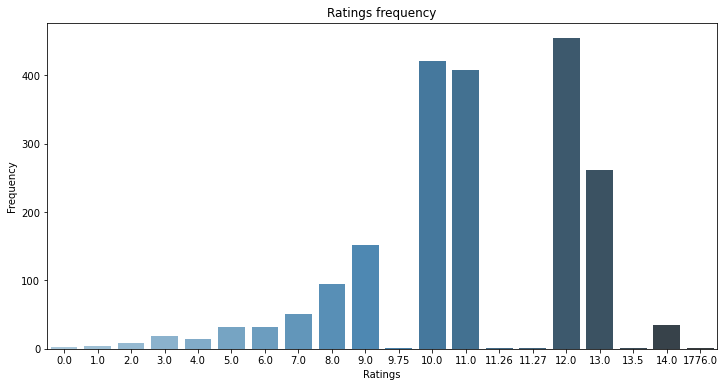

In [299]:
data = all.rating_numerator.value_counts()
x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

## Dog classification

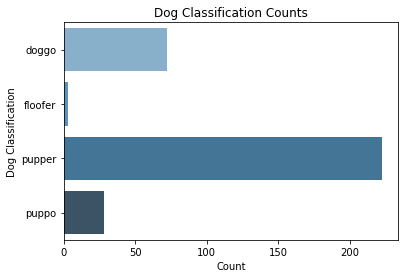

In [290]:
data = all.groupby('dog_classification').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(ylabel='Dog Classification', xlabel='Count', title='Dog Classification Counts')
plt.show()

Majoirty of  dogs are pupper 

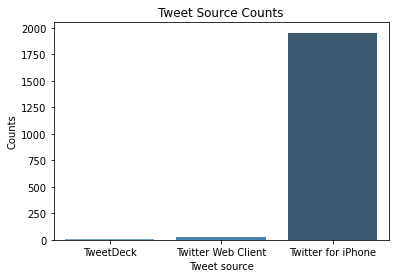

In [300]:
data = all.groupby('source').count()['tweet_id']
ax = sns.barplot(x=data.index, y=data.values, palette='Blues_d')
ax.set(xlabel='Tweet source', ylabel='Counts', title='Tweet Source Counts')
plt.show()

The most frequent  source is Twitter for iphone

0.9129857365917268


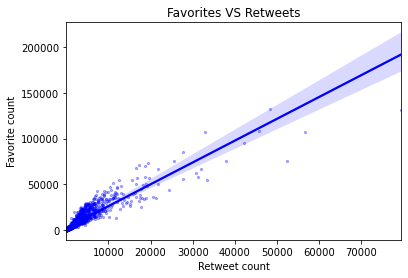

In [302]:
print(all['retweet_count'].corr(all['favorite_count']))
ax = sns.regplot(x = 'retweet_count', y = 'favorite_count', data = all, color = 'b', scatter_kws = {'s': 5, 'alpha': .3}) 
ax.set( xlabel = 'Retweet count', ylabel = 'Favorite count', title = 'Favorites VS Retweets')
plt.show()

Pertaining   the above  of graph and the calculations ( retweets  count and favorite count )  are highly correlated

In [303]:
all.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'retweet_count', 'favorite_count', 'dog_classification', 'breed',
       'confidence'],
      dtype='object')

### The  most common  breeds in images 

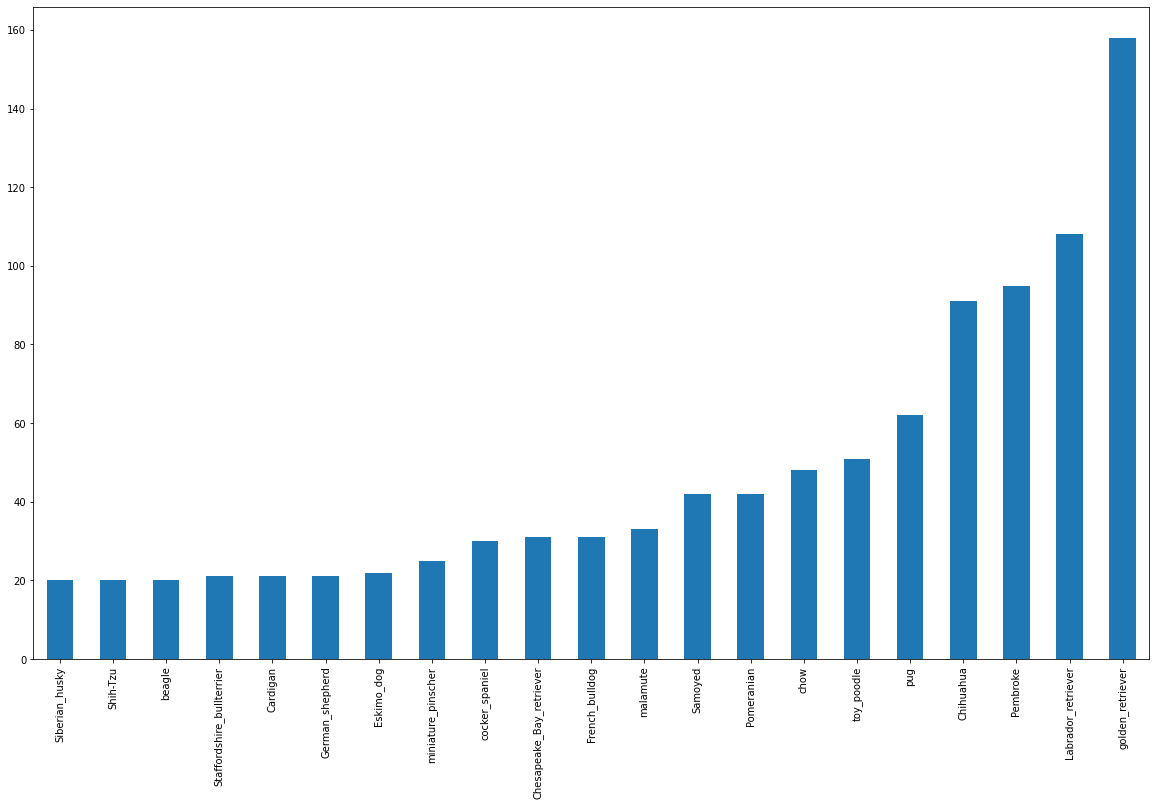

In [304]:
all['breed'].value_counts().sort_values(ascending=False)[20::-1].plot(kind = 'bar', figsize= (20, 12));

## The most common dog breed is " golden_retriever"

## Checking the relation between  the  dog breed and  the favorites count

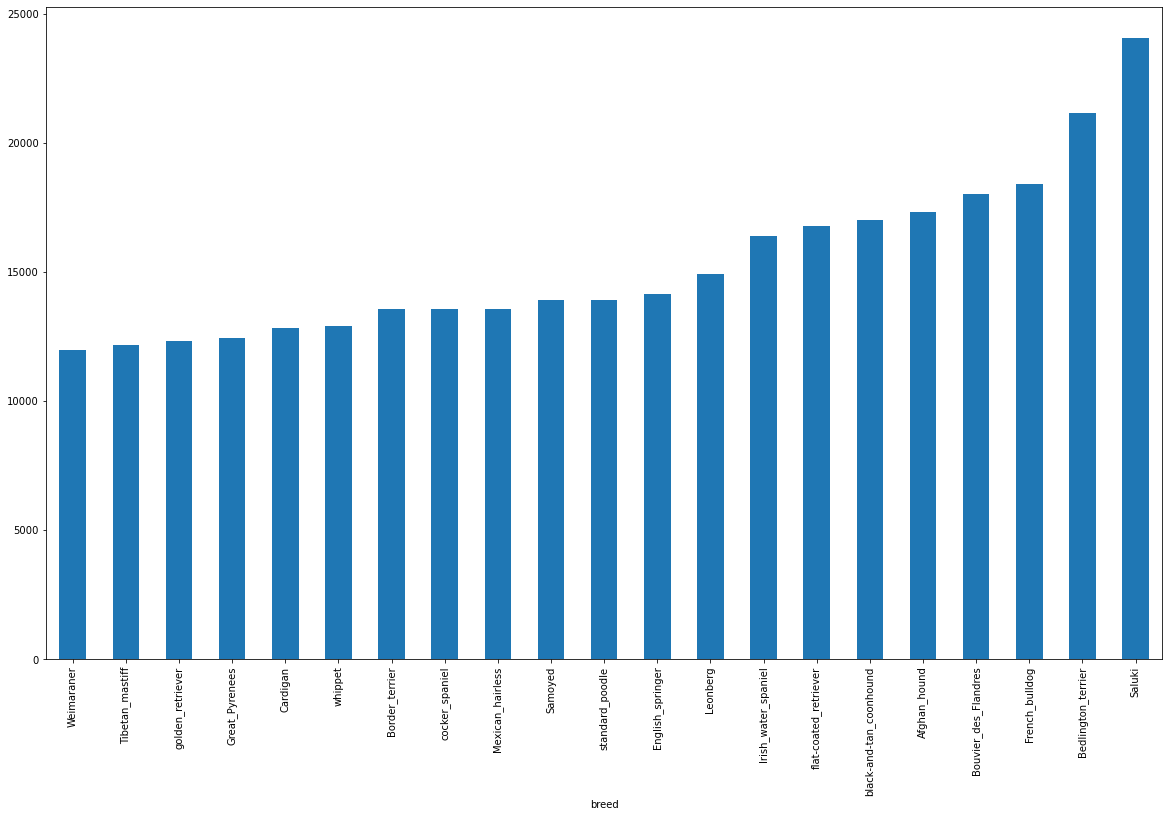

In [305]:
# highest breed for favorites count
all.groupby(['breed']).favorite_count.mean().sort_values(ascending=False)[20::-1].plot(kind = 'bar', figsize= (20, 12));


### BUT  The  most favorite dog type is  "  Saluki  "   not  "golden_retriever" 

### investigating   the relation between  the dog type and the retweet count

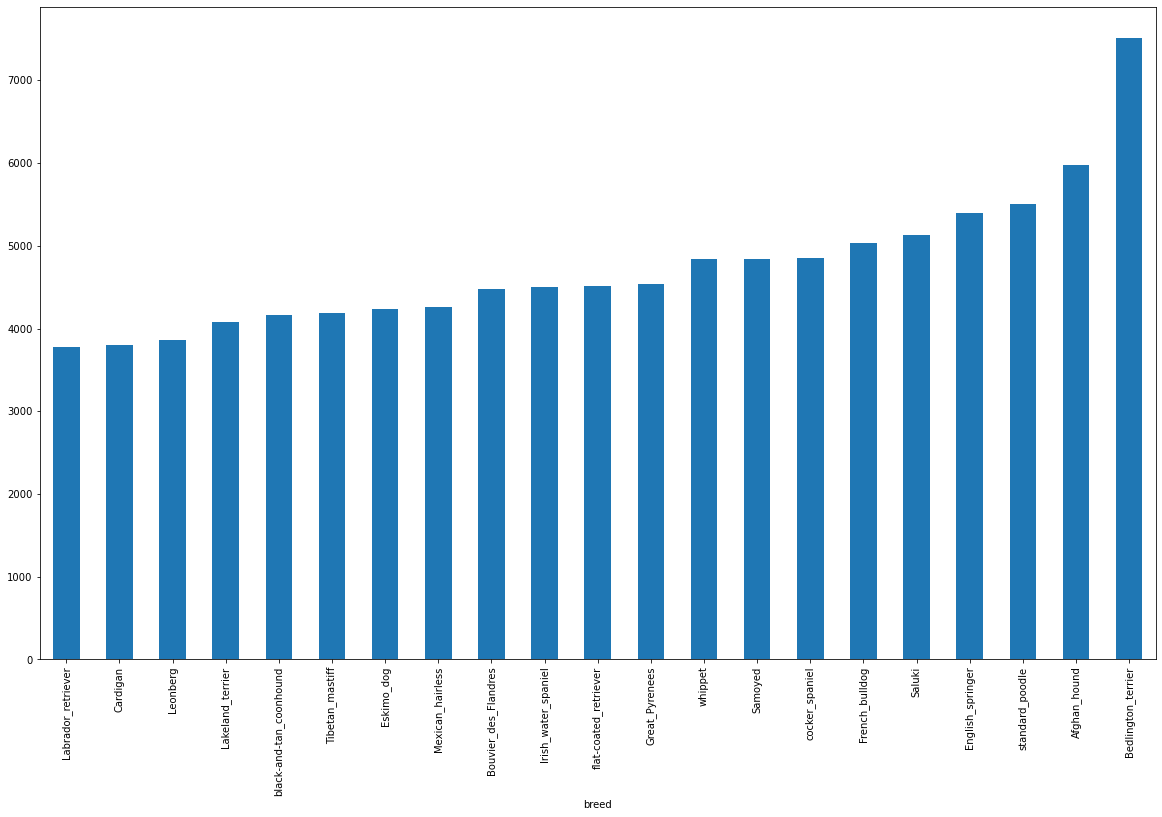

In [306]:
#  The highest breed as per  retweet count

all.groupby(['breed']).retweet_count.mean().sort_values(ascending=False)[20::-1].plot(kind = 'bar', figsize= (20, 12));

### The most Retweeted dog type is bedlington_terrier 